**Decision tree** is a diagram or chart that people use to show a statistical probability.

Each branch of the decision tree represents a possible decision, outcome, or reaction. 

The farthest branches on the tree represent the end results.

The basic algorithm used in decision trees is known as the **ID3(Iterative Dichotomiser 3) (by Quinlan) algorithm.**

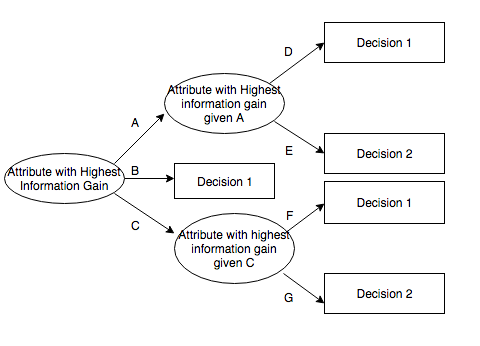

The ID3 algorithm builds decision trees using a top-down, greedy approach. 

A decision tree is used for multi-dimensional analysis with multiple class.It is characterized by fast
execution time and ease in the implementation of the rules.


Gini index and entropy are the criteria for calculating information gain. Decision tree algorithms use information gain to split a node.

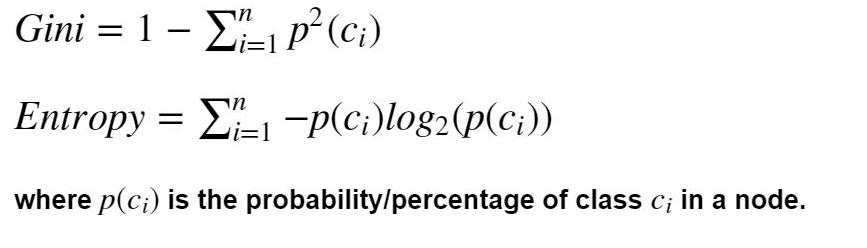

**Gini impurity tends to isolate the most frequent class in its own branch of the tree,while entropy tends to produce slightly more balanced trees.**

The range of Entropy lies in between 0 to 1 and the range of Gini Impurity lies in between 0 to 0.5. Hence we can conclude that Gini Impurity is better as compared to entropy for selecting the best features.


#### Steps to calculate Gini for a split:
-->Calculate Gini for sub-nodes ,using formula sum of square of probability for success and failure (p^2+q^2)   
        
    Where ,p - success,q - failure

-->Calculate Gini for split using weighted Gain score of each node of that split.

**Example:**

 We want to segregate the students based on the target variable (playing Football or not) total Students 30,Playing football  15, in total 30 Students Female 10(2 playing) and Male 20 (13 playing) as well as total Students in class ix students are 14 (6 playing), and     class x are 16(9 playing)

     ->Split on Gender  ->Split on Class
    

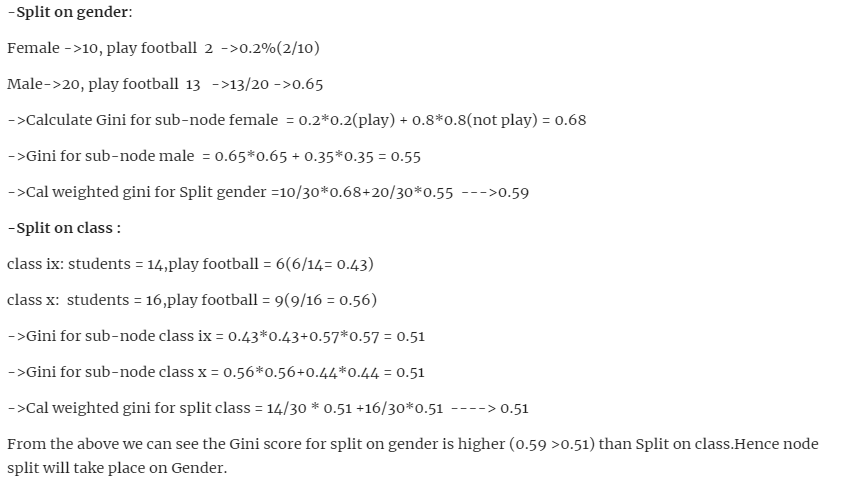

## Information gain
Information gain is created on the basis of the decrease in entropy(S)  after a data set is split. Constructing a decision tree is all about finding an attribute that returns the highest information gain.

Let us consider the same above examples:

Steps :
->Calculate entropy of parent node
->Calculate entropy of each individual node of split and calculate weighted average of all sub nodes available in split.
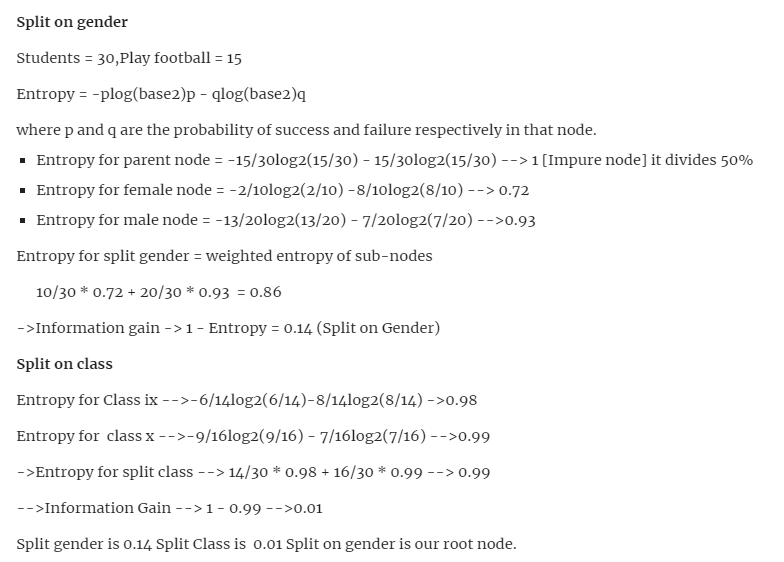

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [33]:
#Read the data
animal = pd.read_csv("https://raw.githubusercontent.com/GirishaDevara/crrcoe/master/2020-02-07/zoo.csv")
print(animal.shape)
animal.sample(2)

(101, 18)


animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
97        wasp     1         0     1     0         1        0         0   
27    fruitbat     1         0     0     1         1        0         0   

    toothed  backbone  breathes  venomous  fins  legs  tail  domestic  \
97        0         0         1         1     0     6     0         0   
27        1         1         1         0     0     2     1         0   

    catsize  class_type  
97        0           6  
27        0           1

In [34]:
print(animal.class_type.unique())

[1 4 2 7 6 5 3]


In [35]:
duplicates = animal.duplicated()
duplicates[duplicates>1]

Series([], dtype: bool)

In [40]:
#join animal table and class table to show actual class names
ani_class = pd.read_csv("https://raw.githubusercontent.com/GirishaDevara/crrcoe/master/2020-02-07/class.csv")
df = pd.merge(animal,ani_class,how = 'left',
              left_on ='class_type',
              right_on = 'Class_Number')
df.sample(3)

animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
26        frog     0         0     1     0         0        1         1   
99        worm     0         0     1     0         0        0         0   
74        seal     1         0     0     1         0        1         1   

    toothed  backbone  ...  fins  legs  tail  domestic  catsize  class_type  \
26        1         1  ...     0     4     0         0        0           5   
99        0         0  ...     0     0     0         0        0           7   
74        1         1  ...     1     0     0         0        1           1   

    Class_Number  Number_Of_Animal_Species_In_Class    Class_Type  \
26             5                                  4     Amphibian   
99             7                                 10  Invertebrate   
74             1                                 41        Mammal   

                                         Animal_Names  
26                             frog, frog, newt, toad  
99  clam, crab, crayfish, lobster, octopus, scorpi...  
74  aardvark, antelope, bear, boar, buffalo, calf,...  

[3 rows x 22 columns]

C:\Users\divya\AppData\Roaming\Python\Python38\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\divya\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


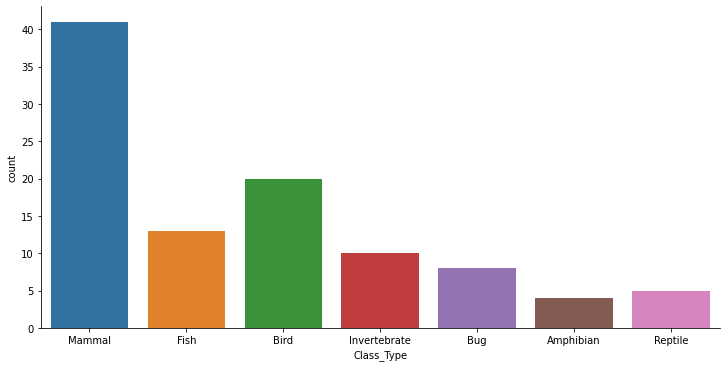

In [41]:
#to plot the number of each class_type
sns.factorplot('Class_Type',data = df,
               kind = 'count',height = 5,
               aspect = 2)

In [42]:
from sklearn.tree import DecisionTreeRegressor

In [43]:
X = animal.iloc[:,1:17]
y = animal.iloc[:,17]
X.head(2)

hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  backbone  \
0     1         0     0     1         0        0         1        1         1   
1     1         0     0     1         0        0         0        1         1   

   breathes  venomous  fins  legs  tail  domestic  catsize  
0         1         0     0     4     0         0        1  
1         1         0     0     4     1         0        1

In [44]:
animal.head(2)

animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   

   class_type  
0           1  
1           1

In [45]:
tree_reg = DecisionTreeRegressor(max_depth =2)
tree_reg.fit(X,y)

DecisionTreeRegressor(max_depth=2)

In [46]:
tree_reg.score(X,y)

0.8854593207759636

criterion :optional default = "gini" or choose attribute selection measure.This parameter allows us to use the attribute selection measure,criterion = "entropy"

splitter: It defines the strategy to choose the split at each node. Supports “best” value to choose the best split & “random” to choose the best random split. By default, it takes “best” value.

max_features: It defines the no. of features to consider when looking for the best split. We can input integer, float, string & None value.

If an integer is inputted then it considers that value as max features at each split. If float value is taken then it shows the percentage of features at each split. If “auto” or “sqrt” is taken then max_features=sqrt(n_features). If “log2” is taken then max_features= log2(n_features). If None, then max_features=n_features. By default, it takes “None” value.

max_depth: The max_depth parameter denotes maximum depth of the tree. It can take any integer value or None. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. By default, it takes “None” value.

min_samples_split: This tells above the minimum no. of samples reqd. to split an internal node. If an integer value is taken then consider min_samples_split as the minimum no. If float, then it shows percentage. By default, it takes “2” value.

min_samples_leaf: The minimum number of samples required to be at a leaf node. If an integer value is taken then consider min_samples_leaf as the minimum no. If float, then it shows percentage. By default, it takes “1” value.

max_leaf_nodes: It defines the maximum number of possible leaf nodes. If None then it takes an unlimited number of leaf nodes. By default, it takes “None” value.

min_impurity_split: It defines the threshold for early stopping tree growth. A node will split if its impurity is above the threshold otherwise it is a leaf.

**export_graphviz** function converts decision tree regressor into **dot file** and 

**pydotplus** convert this dot file to **png** or displayable form on Jupyter.


What is StringIO?

The StringIO module an in-memory file-like object. This object can be used as input or output to the most function that would expect a standard file object. When the StringIO object is created it is initialized by passing a string to the constructer. If no string is passed the StringIO will start empty.

str: Immutable

StringIO: Mutable, file-like interface, which stores strs

A text-mode file handle (as produced by open("somefile.txt")) is also very similar to StringIO (both are "Text I/O"), with the latter allowing you to avoid using an actual file for file-like operations.

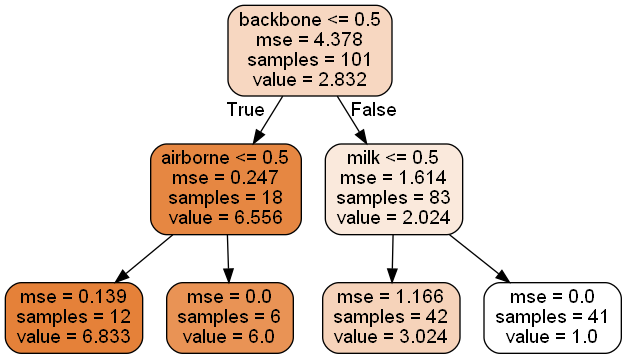

In [16]:
#from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
from six import StringIO
from  pydotplus import graph_from_dot_data
from IPython.display import Image
dot_data = StringIO()
export_graphviz(tree_reg,out_file=dot_data,
                filled = True,rounded = True,
                feature_names = X.columns,
                class_names=['1','2','3','4','5','6','7'])
graph = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

**Strengths Of Decision trees:**

For smaller trees,not much mathematical and computational knowledge is required to understand

->Provides a definite clue of which features are more useful for classification.

->It can handle both numerical and categorical variables.

**Weakness of Decision trees:**

-> Decision tree models are often biased towards features having more number of possible values,i.e.,levels.

-> Large trees are complex to understand and it is computationally expensive to train.

 Balancing over fitting and under fitting in decision tree is a very tricky involving more of an art than science.The only way to master it is continue working with more number of data sets with lot of diversity..

##### Another Data set

In [19]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
#create the array including the data
data = [[8,8,'dog'],[50,40,'dog'],[8,9,'cat'],[15,12,'dog'],[9,9.8,'cat']]
#generate a dataframe 
df = pd.DataFrame(data,columns = ['weight','height','label'])
df

weight  height label
0       8     8.0   dog
1      50    40.0   dog
2       8     9.0   cat
3      15    12.0   dog
4       9     9.8   cat

In [27]:

#defining the predictors
X = df[['weight','height']]
#defining the target 
y = df['label']
y

0    dog
1    dog
2    cat
3    dog
4    cat
Name: label, dtype: object

In [28]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
y = LE.fit_transform(y)
y

array([1, 1, 0, 1, 0])

In [23]:
tree = DecisionTreeRegressor()
#fitting the model
model = tree.fit(X,y)

In [25]:
tree.predict([[9,9.8]])

array([0.])

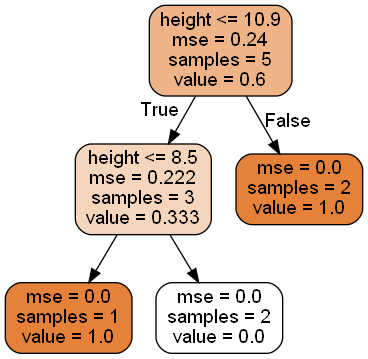

In [30]:
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
dot_data = StringIO()
export_graphviz(model,out_file=dot_data,
                filled = True,rounded = True,
                feature_names = X.columns,
                class_names=["cat","dog"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [31]:
tree.score(X,y)

1.0